# Ecommerce Product Price Analysis

Data Analysis Assignment - Rokomari

## Import Libraries

In [1]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

## Data Extraction

In [3]:
file_src = r'E:\self_dev\rokomari_assignment\data\ecommerce_product_prices.csv'

df = pd.read_csv(file_src)

df.head()

ProductID            ProductName  Price_Rokomari  Rating_Rokomari  \
0        101          The Alchemist             380              4.5   
1        102                   1984             450              4.6   
2        103  To Kill a Mockingbird             500              4.7   
3        104                Sapiens             600              4.8   
4        105               Becoming             700              4.9   

   Reviews_Rokomari  Price_Wafilife  Rating_Wafilife  Reviews_Wafilife  \
0               120             370              4.4               110   
1                95             440              4.5                90   
2               150             490              4.6               145   
3               200             590              4.7               195   
4               180             690              4.8               175   

   Price_MamunBookHouse  Rating_MamunBookHouse  Reviews_MamunBookHouse  \
0                   360                    4.3                     100   
1                   430                    4.4                      85   
2                   480                    4.5                     140   
3                   580                    4.6                     190   
4                   680                    4.7                     170   

   Price_BoiBazar  Rating_BoiBazar  Reviews_BoiBazar  
0             350              4.2              90.0  
1             420              4.3              80.0  
2             470              4.4             135.0  
3             570              4.5             185.0  
4             670              4.6             165.0

In [4]:
df.columns

Index(['ProductID', 'ProductName', 'Price_Rokomari', 'Rating_Rokomari',
       'Reviews_Rokomari', 'Price_Wafilife', 'Rating_Wafilife',
       'Reviews_Wafilife', 'Price_MamunBookHouse', 'Rating_MamunBookHouse',
       'Reviews_MamunBookHouse', 'Price_BoiBazar', 'Rating_BoiBazar',
       'Reviews_BoiBazar'],
      dtype='object')

In [93]:
# lowering col names
df.columns = [col.lower() for col in df.columns]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   productid               12 non-null     int64  
 1   productname             12 non-null     object 
 2   price_rokomari          12 non-null     int64  
 3   rating_rokomari         12 non-null     float64
 4   reviews_rokomari        12 non-null     int64  
 5   price_wafilife          12 non-null     int64  
 6   rating_wafilife         12 non-null     float64
 7   reviews_wafilife        12 non-null     int64  
 8   price_mamunbookhouse    12 non-null     int64  
 9   rating_mamunbookhouse   11 non-null     float64
 10  reviews_mamunbookhouse  12 non-null     int64  
 11  price_boibazar          12 non-null     int64  
 12  rating_boibazar         11 non-null     float64
 13  reviews_boibazar        11 non-null     float64
dtypes: float64(5), int64(8), object(1)
memory us

each reviews are shown in `int64`, natural for review counts. But, reviews from boibazar are in `float64`. Should be taken care of later in data cleaning. (reviews_boibazar: `float64` -> `int64`)

In [95]:
df.shape

(12, 14)

In [96]:
df.head()

productid            productname  price_rokomari  rating_rokomari  \
0        101          The Alchemist             380              4.5   
1        102                   1984             450              4.6   
2        103  To Kill a Mockingbird             500              4.7   
3        104                Sapiens             600              4.8   
4        105               Becoming             700              4.9   

   reviews_rokomari  price_wafilife  rating_wafilife  reviews_wafilife  \
0               120             370              4.4               110   
1                95             440              4.5                90   
2               150             490              4.6               145   
3               200             590              4.7               195   
4               180             690              4.8               175   

   price_mamunbookhouse  rating_mamunbookhouse  reviews_mamunbookhouse  \
0                   360                    4.3                     100   
1                   430                    4.4                      85   
2                   480                    4.5                     140   
3                   580                    4.6                     190   
4                   680                    4.7                     170   

   price_boibazar  rating_boibazar  reviews_boibazar  
0             350              4.2              90.0  
1             420              4.3              80.0  
2             470              4.4             135.0  
3             570              4.5             185.0  
4             670              4.6             165.0

## Data Cleaning

### Check for Duplicate & Missing Data

The dataset contains prices and reviews of products in each row, so each row is expected to have prices, reviews against a productid and that ***productid should not be repeated*** in the dataset.

So, check for duplicate data, especially in productid. Also check if any missing value there (NaN values)

In [97]:
df.isna().sum()

productid                 0
productname               0
price_rokomari            0
rating_rokomari           0
reviews_rokomari          0
price_wafilife            0
rating_wafilife           0
reviews_wafilife          0
price_mamunbookhouse      0
rating_mamunbookhouse     1
reviews_mamunbookhouse    0
price_boibazar            0
rating_boibazar           1
reviews_boibazar          1
dtype: int64

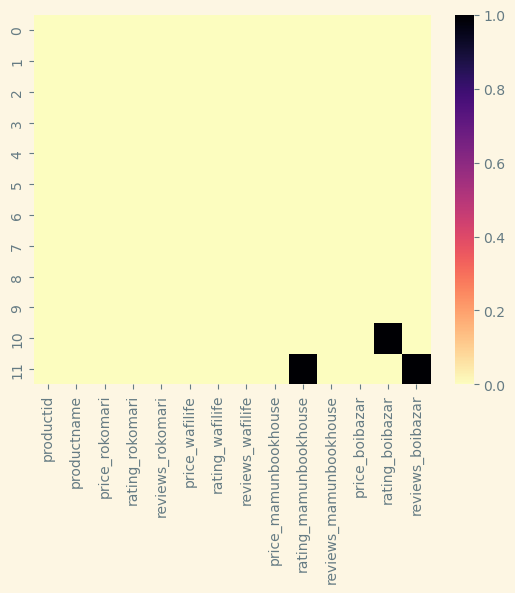

In [98]:
sns.heatmap(df.isna(), yticklabels=True, cmap='magma_r');

In [99]:
df.nunique()

productid                 10
productname               10
price_rokomari            10
rating_rokomari            8
reviews_rokomari          10
price_wafilife            10
rating_wafilife            8
reviews_wafilife          10
price_mamunbookhouse      10
rating_mamunbookhouse      8
reviews_mamunbookhouse     9
price_boibazar            10
rating_boibazar            8
reviews_boibazar          10
dtype: int64

In [100]:
print(f'dataset entries: {df.shape[0]}')

dataset entries: 12


In [101]:
df['productid'].duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
Name: productid, dtype: bool

In [102]:
df['productid'].duplicated().sum()

2

In [103]:
df[df['productid'].duplicated()]

productid    productname  price_rokomari  rating_rokomari  \
10        101  The Alchemist             380              4.5   
11        102           1984             450              4.6   

    reviews_rokomari  price_wafilife  rating_wafilife  reviews_wafilife  \
10               120             370              4.4               110   
11                95             440              4.5                90   

    price_mamunbookhouse  rating_mamunbookhouse  reviews_mamunbookhouse  \
10                   360                    4.3                     100   
11                   430                    NaN                      85   

    price_boibazar  rating_boibazar  reviews_boibazar  
10             350              NaN              90.0  
11             420              4.3               NaN

***Observation***
- Its evident that there are `3 NaN` values in each of rating_mamunbookhouse, rating_boibazar and reviews_boibazar.
- Interestingly they are in the `index 10 and 11`.
- There are `10 unique` productid but the dataset has `12 entries` --> ***indicating 2 duplicate productid hence 2 duplicate rows.***
- using .duplicated() confirmed that there are duplicate values. And they are `index 10 and 11`.

So, dropping duplicate rows (index 10 & 11) would ***address both duplicacy and missing values***.

### Duplicacy Filtration & Handling Missing Values

In [104]:
df_cleaned = df[~df['productid'].duplicated()]

df_cleaned.head()

productid            productname  price_rokomari  rating_rokomari  \
0        101          The Alchemist             380              4.5   
1        102                   1984             450              4.6   
2        103  To Kill a Mockingbird             500              4.7   
3        104                Sapiens             600              4.8   
4        105               Becoming             700              4.9   

   reviews_rokomari  price_wafilife  rating_wafilife  reviews_wafilife  \
0               120             370              4.4               110   
1                95             440              4.5                90   
2               150             490              4.6               145   
3               200             590              4.7               195   
4               180             690              4.8               175   

   price_mamunbookhouse  rating_mamunbookhouse  reviews_mamunbookhouse  \
0                   360                    4.3                     100   
1                   430                    4.4                      85   
2                   480                    4.5                     140   
3                   580                    4.6                     190   
4                   680                    4.7                     170   

   price_boibazar  rating_boibazar  reviews_boibazar  
0             350              4.2              90.0  
1             420              4.3              80.0  
2             470              4.4             135.0  
3             570              4.5             185.0  
4             670              4.6             165.0

In [105]:
print(f'cleaned dataset entries: {df_cleaned.shape[0]}')

cleaned dataset entries: 10


In [106]:
df_cleaned['productid'].duplicated().sum()

0

In [107]:
df_cleaned.isna().sum()

productid                 0
productname               0
price_rokomari            0
rating_rokomari           0
reviews_rokomari          0
price_wafilife            0
rating_wafilife           0
reviews_wafilife          0
price_mamunbookhouse      0
rating_mamunbookhouse     0
reviews_mamunbookhouse    0
price_boibazar            0
rating_boibazar           0
reviews_boibazar          0
dtype: int64

### Cleaning Datatypes

Taking care of reviews_boibazar as mentioned previously: (reviews_boibazar: `float64` -> `int64`)

In [110]:
df_cleaned.loc[:, 'reviews_boibazar'] = df_cleaned['reviews_boibazar'].astype('int64')

In [109]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   productid               10 non-null     int64  
 1   productname             10 non-null     object 
 2   price_rokomari          10 non-null     int64  
 3   rating_rokomari         10 non-null     float64
 4   reviews_rokomari        10 non-null     int64  
 5   price_wafilife          10 non-null     int64  
 6   rating_wafilife         10 non-null     float64
 7   reviews_wafilife        10 non-null     int64  
 8   price_mamunbookhouse    10 non-null     int64  
 9   rating_mamunbookhouse   10 non-null     float64
 10  reviews_mamunbookhouse  10 non-null     int64  
 11  price_boibazar          10 non-null     int64  
 12  rating_boibazar         10 non-null     float64
 13  reviews_boibazar        10 non-null     int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1

In [111]:
df_cleaned.head()

productid            productname  price_rokomari  rating_rokomari  \
0        101          The Alchemist             380              4.5   
1        102                   1984             450              4.6   
2        103  To Kill a Mockingbird             500              4.7   
3        104                Sapiens             600              4.8   
4        105               Becoming             700              4.9   

   reviews_rokomari  price_wafilife  rating_wafilife  reviews_wafilife  \
0               120             370              4.4               110   
1                95             440              4.5                90   
2               150             490              4.6               145   
3               200             590              4.7               195   
4               180             690              4.8               175   

   price_mamunbookhouse  rating_mamunbookhouse  reviews_mamunbookhouse  \
0                   360                    4.3                     100   
1                   430                    4.4                      85   
2                   480                    4.5                     140   
3                   580                    4.6                     190   
4                   680                    4.7                     170   

   price_boibazar  rating_boibazar  reviews_boibazar  
0             350              4.2                90  
1             420              4.3                80  
2             470              4.4               135  
3             570              4.5               185  
4             670              4.6               165

In [112]:
df_cleaned.loc[:, :] = df_cleaned.sort_values(by=['productid'])

In [113]:
df_cleaned.head()

productid            productname  price_rokomari  rating_rokomari  \
0        101          The Alchemist             380              4.5   
1        102                   1984             450              4.6   
2        103  To Kill a Mockingbird             500              4.7   
3        104                Sapiens             600              4.8   
4        105               Becoming             700              4.9   

   reviews_rokomari  price_wafilife  rating_wafilife  reviews_wafilife  \
0               120             370              4.4               110   
1                95             440              4.5                90   
2               150             490              4.6               145   
3               200             590              4.7               195   
4               180             690              4.8               175   

   price_mamunbookhouse  rating_mamunbookhouse  reviews_mamunbookhouse  \
0                   360                    4.3                     100   
1                   430                    4.4                      85   
2                   480                    4.5                     140   
3                   580                    4.6                     190   
4                   680                    4.7                     170   

   price_boibazar  rating_boibazar  reviews_boibazar  
0             350              4.2                90  
1             420              4.3                80  
2             470              4.4               135  
3             570              4.5               185  
4             670              4.6               165

## Exporting Cleaned data


In [24]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

## Feature Extraction

`rpp`: rating/price [of rokomari only]

In [116]:
df_cleaned.loc[:,'rpp'] = df_cleaned['rating_rokomari'] / df_cleaned['price_rokomari']

In [117]:
df_cleaned[['productid', 'rpp']].head()

productid       rpp
0        101  0.011842
1        102  0.010222
2        103  0.009400
3        104  0.008000
4        105  0.007000

## Price Monitoring Analysis

- for each productid, there are 3 numeric info
    - price
    - rating
    - review
- they contain these info for 
    - rokomari
    - wafilife
    - mamunbookhouse
    - boibazar

In [118]:
df_cleaned.head()

productid            productname  price_rokomari  rating_rokomari  \
0        101          The Alchemist             380              4.5   
1        102                   1984             450              4.6   
2        103  To Kill a Mockingbird             500              4.7   
3        104                Sapiens             600              4.8   
4        105               Becoming             700              4.9   

   reviews_rokomari  price_wafilife  rating_wafilife  reviews_wafilife  \
0               120             370              4.4               110   
1                95             440              4.5                90   
2               150             490              4.6               145   
3               200             590              4.7               195   
4               180             690              4.8               175   

   price_mamunbookhouse  rating_mamunbookhouse  reviews_mamunbookhouse  \
0                   360                    4.3                     100   
1                   430                    4.4                      85   
2                   480                    4.5                     140   
3                   580                    4.6                     190   
4                   680                    4.7                     170   

   price_boibazar  rating_boibazar  reviews_boibazar       rpp  
0             350              4.2                90  0.011842  
1             420              4.3                80  0.010222  
2             470              4.4               135  0.009400  
3             570              4.5               185  0.008000  
4             670              4.6               165  0.007000

### Data Relation Across Sites

In [119]:
plt.style.use(plt.style.available[0])

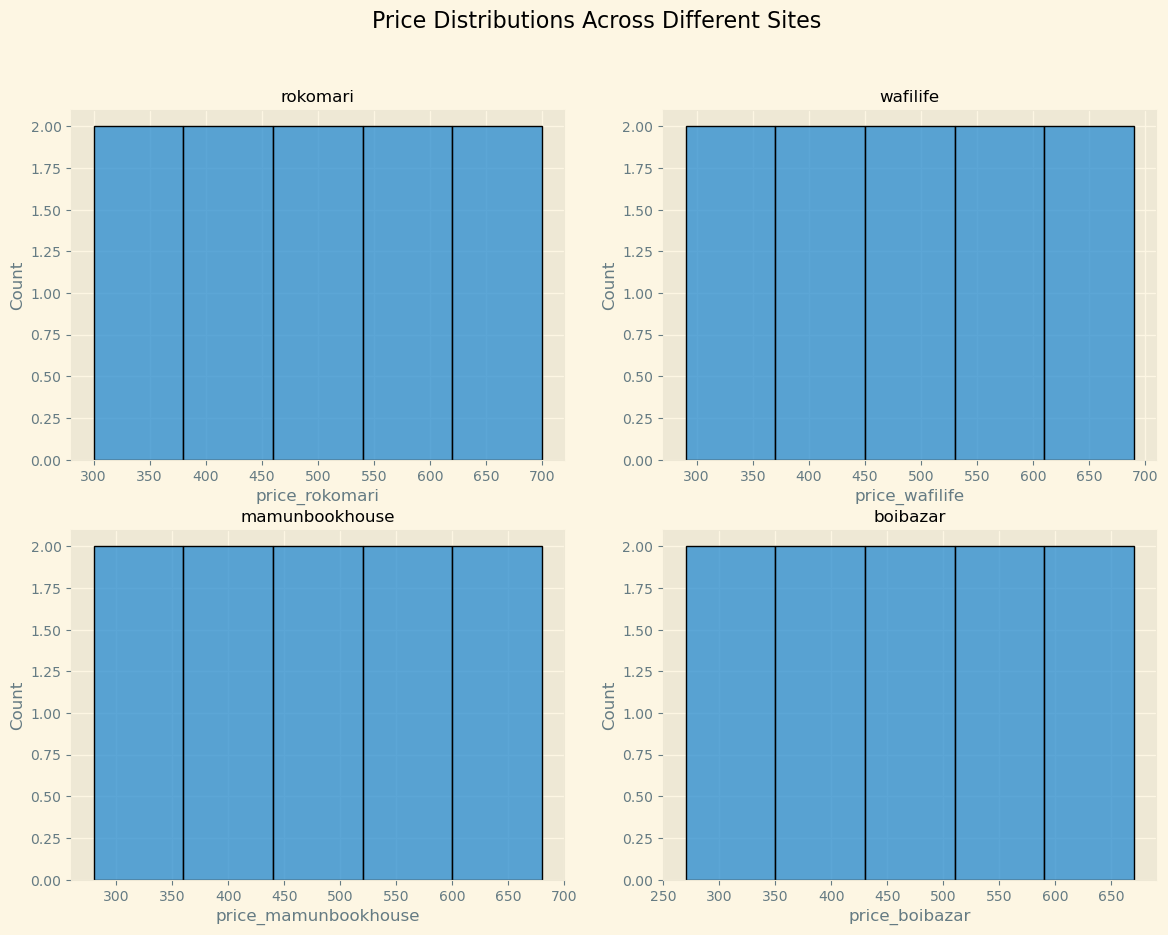

In [120]:
fig, ax = plt.subplots(2,2, figsize=(14,10))
sns.histplot(data=df_cleaned, x='price_rokomari', ax=ax[0][0])
sns.histplot(data=df_cleaned, x='price_wafilife', ax=ax[0][1])
sns.histplot(data=df_cleaned, x='price_mamunbookhouse', ax=ax[1][0])
sns.histplot(data=df_cleaned, x='price_boibazar', ax=ax[1][1])

ax[0][0].set_title('rokomari', fontsize=12)
ax[0][1].set_title('wafilife', fontsize=12)
ax[1][0].set_title('mamunbookhouse', fontsize=12)
ax[1][1].set_title('boibazar', fontsize=12)
fig.suptitle('Price Distributions Across Different Sites', fontsize=16)

plt.show()

The histogram distributions of prices across different sites indicate ***odd similarities of data between sites***.

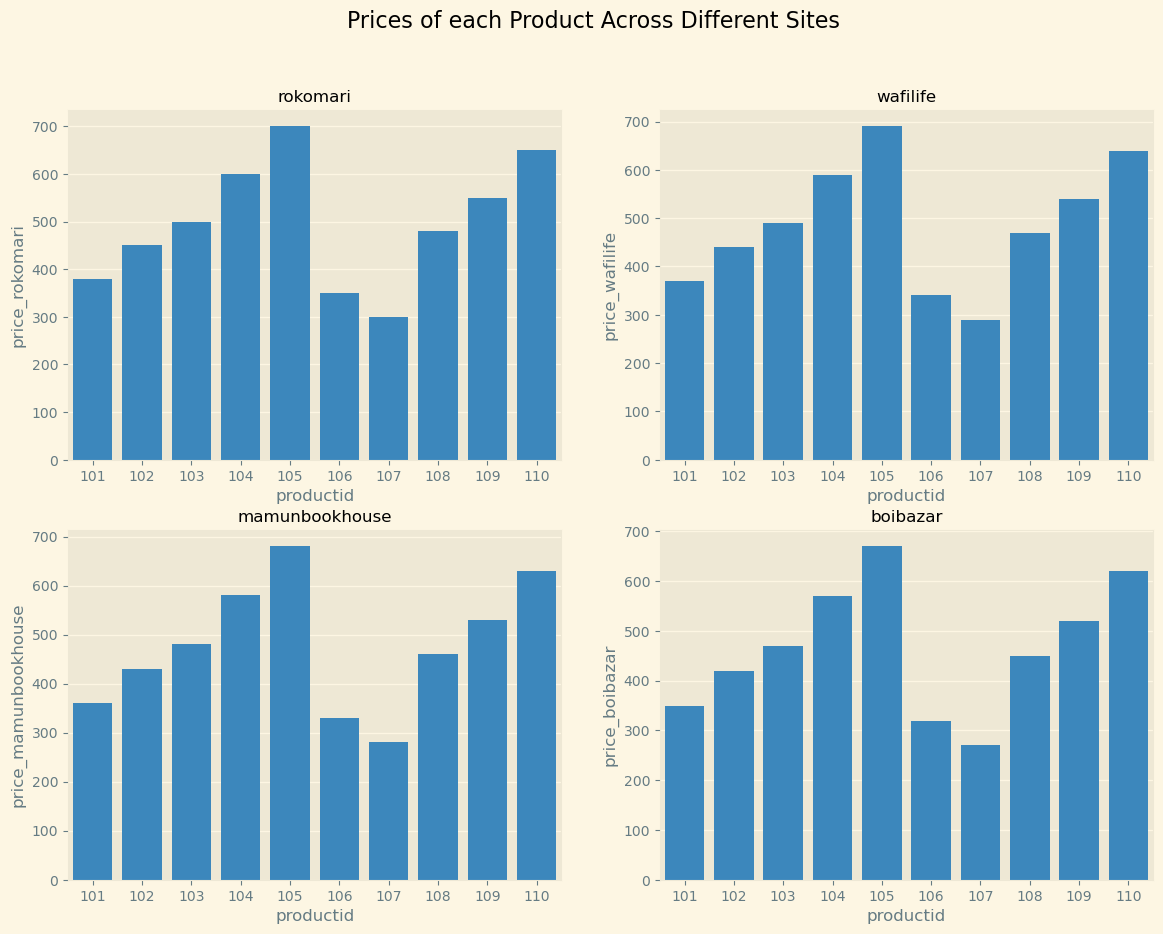

In [121]:
fig, ax = plt.subplots(2,2, figsize=(14,10))
sns.barplot(data=df_cleaned,x='productid', y='price_rokomari', ax=ax[0][0])
sns.barplot(data=df_cleaned,x='productid', y='price_wafilife', ax=ax[0][1])
sns.barplot(data=df_cleaned,x='productid', y='price_mamunbookhouse', ax=ax[1][0])
sns.barplot(data=df_cleaned,x='productid', y='price_boibazar', ax=ax[1][1])

ax[0][0].set_title('rokomari', fontsize=12)
ax[0][1].set_title('wafilife', fontsize=12)
ax[1][0].set_title('mamunbookhouse', fontsize=12)
ax[1][1].set_title('boibazar', fontsize=12)
fig.suptitle('Prices of each Product Across Different Sites', fontsize=16)

plt.show()

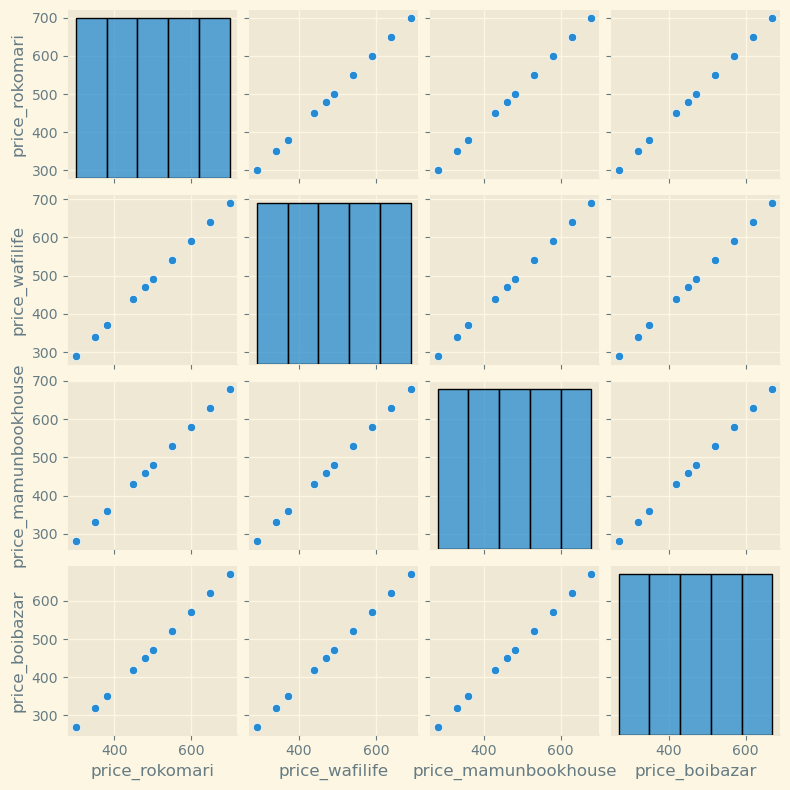

In [122]:
sns.pairplot(df_cleaned[['price_rokomari', 'price_wafilife', 'price_mamunbookhouse', 'price_boibazar']], height=2);

In [123]:
df_cleaned[['price_rokomari', 'price_wafilife', 'price_mamunbookhouse', 'price_boibazar']].corr()

price_rokomari  price_wafilife  price_mamunbookhouse  \
price_rokomari                   1.0             1.0                   1.0   
price_wafilife                   1.0             1.0                   1.0   
price_mamunbookhouse             1.0             1.0                   1.0   
price_boibazar                   1.0             1.0                   1.0   

                      price_boibazar  
price_rokomari                   1.0  
price_wafilife                   1.0  
price_mamunbookhouse             1.0  
price_boibazar                   1.0

The bar charts, pairplot and the correlations: both claim that the ***data across all 4 sites are highly similar***.

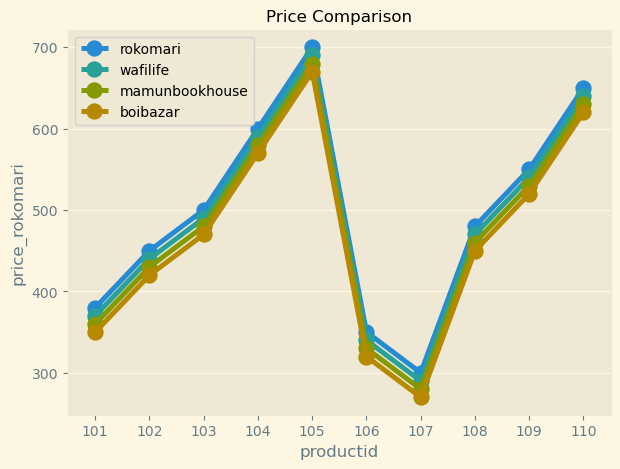

In [124]:
_, ax = plt.subplots(figsize=(7,5))
sns.pointplot(data=df_cleaned,x='productid', y='price_rokomari', label='rokomari')
sns.pointplot(data=df_cleaned,x='productid', y='price_wafilife', label='wafilife')
sns.pointplot(data=df_cleaned,x='productid', y='price_mamunbookhouse', label='mamunbookhouse')
sns.pointplot(data=df_cleaned,x='productid', y='price_boibazar', label='boibazar')

ax.set_title('Price Comparison', fontsize=12)

plt.show()

It seems prices have almost constant ***offsets*** across the sites comparing with rokomari prices.

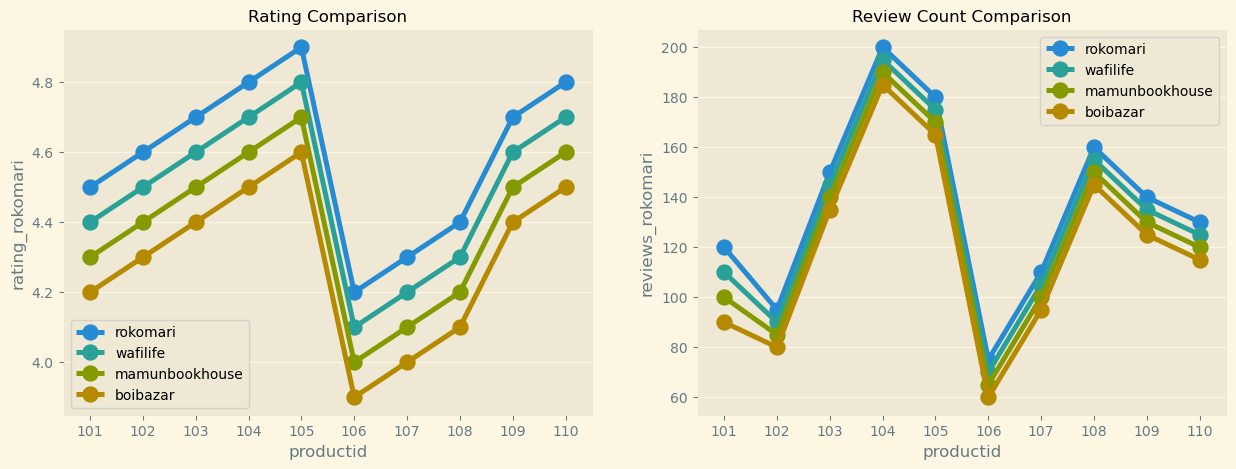

In [125]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.pointplot(data=df_cleaned,x='productid', y='rating_rokomari', label='rokomari', ax=ax[0])
sns.pointplot(data=df_cleaned,x='productid', y='rating_wafilife', label='wafilife', ax=ax[0])
sns.pointplot(data=df_cleaned,x='productid', y='rating_mamunbookhouse', label='mamunbookhouse', ax=ax[0])
sns.pointplot(data=df_cleaned,x='productid', y='rating_boibazar', label='boibazar', ax=ax[0])

sns.pointplot(data=df_cleaned,x='productid', y='reviews_rokomari', label='rokomari', ax=ax[1])
sns.pointplot(data=df_cleaned,x='productid', y='reviews_wafilife', label='wafilife', ax=ax[1])
sns.pointplot(data=df_cleaned,x='productid', y='reviews_mamunbookhouse', label='mamunbookhouse', ax=ax[1])
sns.pointplot(data=df_cleaned,x='productid', y='reviews_boibazar', label='boibazar', ax=ax[1])

ax[0].set_title('Rating Comparison', fontsize=12)
ax[1].set_title('Review Count Comparison', fontsize=12)

plt.show()

Same trend is observed in rating and reviews as well.

In [126]:
data = {}
elements = ['price', 'rating', 'reviews']
sites = ['wafilife', 'mamunbookhouse', 'boibazar']

for elem in elements:
  for site in sites:
          data[f'{elem}_{site}_offset'] = df_cleaned[f'{elem}_{site}'] - df_cleaned[f'{elem}_rokomari']

In [127]:
offset_data = pd.DataFrame(data=data) # type: ignore
offset_data.set_index(df_cleaned['productid'], inplace=True)
offset_data

price_wafilife_offset  price_mamunbookhouse_offset  \
productid                                                       
101                          -10                          -20   
102                          -10                          -20   
103                          -10                          -20   
104                          -10                          -20   
105                          -10                          -20   
106                          -10                          -20   
107                          -10                          -20   
108                          -10                          -20   
109                          -10                          -20   
110                          -10                          -20   

           price_boibazar_offset  rating_wafilife_offset  \
productid                                                  
101                          -30                    -0.1   
102                          -30                    -0.1   
103                          -30                    -0.1   
104                          -30                    -0.1   
105                          -30                    -0.1   
106                          -30                    -0.1   
107                          -30                    -0.1   
108                          -30                    -0.1   
109                          -30                    -0.1   
110                          -30                    -0.1   

           rating_mamunbookhouse_offset  rating_boibazar_offset  \
productid                                                         
101                                -0.2                    -0.3   
102                                -0.2                    -0.3   
103                                -0.2                    -0.3   
104                                -0.2                    -0.3   
105                                -0.2                    -0.3   
106                                -0.2                    -0.3   
107                                -0.2                    -0.3   
108                                -0.2                    -0.3   
109                                -0.2                    -0.3   
110                                -0.2                    -0.3   

           reviews_wafilife_offset  reviews_mamunbookhouse_offset  \
productid                                                           
101                            -10                            -20   
102                             -5                            -10   
103                             -5                            -10   
104                             -5                            -10   
105                             -5                            -10   
106                             -5                            -10   
107                             -5                            -10   
108                             -5                            -10   
109                             -5                            -10   
110                             -5                            -10   

           reviews_boibazar_offset  
productid                           
101                            -30  
102                            -15  
103                            -15  
104                            -15  
105                            -15  
106                            -15  
107                            -15  
108                            -15  
109                            -15  
110                            -15

The above table refers ***offset*** of all 3 other sites from rokomari in respective attributes (price/rating/reviews).

Observation:
- prices and ratings of all 3 sites are off by a ***constant value*** from rokomari prices respectively.
- execpt for `productid 101`, reviews are off by a ***constant value*** from rokomari reviews as well.

In [128]:
offset_data.describe()

price_wafilife_offset  price_mamunbookhouse_offset  \
count                   10.0                         10.0   
mean                   -10.0                        -20.0   
std                      0.0                          0.0   
min                    -10.0                        -20.0   
25%                    -10.0                        -20.0   
50%                    -10.0                        -20.0   
75%                    -10.0                        -20.0   
max                    -10.0                        -20.0   

       price_boibazar_offset  rating_wafilife_offset  \
count                   10.0            1.000000e+01   
mean                   -30.0           -1.000000e-01   
std                      0.0            4.681111e-16   
min                    -30.0           -1.000000e-01   
25%                    -30.0           -1.000000e-01   
50%                    -30.0           -1.000000e-01   
75%                    -30.0           -1.000000e-01   
max                    -30.0           -1.000000e-01   

       rating_mamunbookhouse_offset  rating_boibazar_offset  \
count                  1.000000e+01            1.000000e+01   
mean                  -2.000000e-01           -3.000000e-01   
std                    2.809276e-16            3.774033e-16   
min                   -2.000000e-01           -3.000000e-01   
25%                   -2.000000e-01           -3.000000e-01   
50%                   -2.000000e-01           -3.000000e-01   
75%                   -2.000000e-01           -3.000000e-01   
max                   -2.000000e-01           -3.000000e-01   

       reviews_wafilife_offset  reviews_mamunbookhouse_offset  \
count                10.000000                      10.000000   
mean                 -5.500000                     -11.000000   
std                   1.581139                       3.162278   
min                 -10.000000                     -20.000000   
25%                  -5.000000                     -10.000000   
50%                  -5.000000                     -10.000000   
75%                  -5.000000                     -10.000000   
max                  -5.000000                     -10.000000   

       reviews_boibazar_offset  
count                10.000000  
mean                -16.500000  
std                   4.743416  
min                 -30.000000  
25%                 -15.000000  
50%                 -15.000000  
75%                 -15.000000  
max                 -15.000000

In [129]:
avg_offset = offset_data.mean()

avg_offset

price_wafilife_offset           -10.0
price_mamunbookhouse_offset     -20.0
price_boibazar_offset           -30.0
rating_wafilife_offset           -0.1
rating_mamunbookhouse_offset     -0.2
rating_boibazar_offset           -0.3
reviews_wafilife_offset          -5.5
reviews_mamunbookhouse_offset   -11.0
reviews_boibazar_offset         -16.5
dtype: float64

Compared to rokomari products, on average:
- prices from wafilife, mamunbookstore and boibazar are 10, 20 and 30 unit less respectively --> rokomari is ***expensive***
- ratings from wafilife, mamunbookstore and boibazar are .1, .2 and .3 unit less respectively --> rokomari has ***better ratings***
- reviews from wafilife, mamunbookstore and boibazar are 5.5, 11 and 16.5 unit less respectively --> rokomari has ***more reviews***

The following bar plots visualize these comparisons.

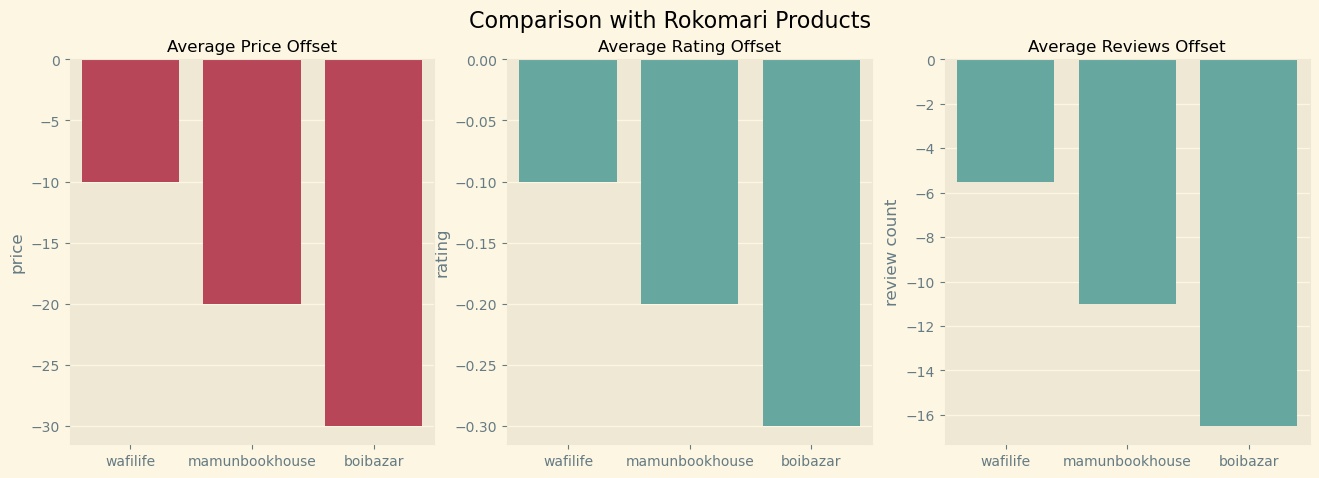

In [130]:
sites = ['wafilife', 'mamunbookhouse', 'boibazar']

fig, ax = plt.subplots(1,3, figsize=(16,5))

g1 = sns.barplot(x=sites, y=avg_offset[:3], color='#cb334c', ax=ax[0])
g2= sns.barplot(x=sites, y=avg_offset[3:6], color='#5bb2a7', ax=ax[1])
g3 = sns.barplot(x=sites, y=avg_offset[6:], color='#5bb2a7', ax=ax[2])

ax[0].set_title('Average Price Offset', fontsize=12)
ax[1].set_title('Average Rating Offset', fontsize=12)
ax[2].set_title('Average Reviews Offset', fontsize=12)

ax[0].ylabel = 'Average Price Offset'

g1.set_ylabel('price')
g2.set_ylabel('rating')
g3.set_ylabel('review count')

fig.suptitle('Comparison with Rokomari Products', fontsize=16)

plt.show()

### Aggregrate Summary Statistics

In [131]:
df_cleaned.describe().loc[:, 'price_rokomari':'reviews_boibazar'] # aggregration of productid makes no sense

price_rokomari  rating_rokomari  reviews_rokomari  price_wafilife  \
count       10.000000        10.000000         10.000000       10.000000   
mean       496.000000         4.590000        136.000000      486.000000   
std        131.080976         0.233095         38.282575      131.080976   
min        300.000000         4.200000         75.000000      290.000000   
25%        397.500000         4.425000        112.500000      387.500000   
50%        490.000000         4.650000        135.000000      480.000000   
75%        587.500000         4.775000        157.500000      577.500000   
max        700.000000         4.900000        200.000000      690.000000   

       rating_wafilife  reviews_wafilife  price_mamunbookhouse  \
count        10.000000         10.000000             10.000000   
mean          4.490000        130.500000            476.000000   
std           0.233095         38.546509            131.080976   
min           4.100000         70.000000            280.000000   
25%           4.325000        106.250000            377.500000   
50%           4.550000        130.000000            470.000000   
75%           4.675000        152.500000            567.500000   
max           4.800000        195.000000            680.000000   

       rating_mamunbookhouse  reviews_mamunbookhouse  price_boibazar  \
count              10.000000               10.000000       10.000000   
mean                4.390000              125.000000      466.000000   
std                 0.233095               38.873013      131.080976   
min                 4.000000               65.000000      270.000000   
25%                 4.225000              100.000000      367.500000   
50%                 4.450000              125.000000      460.000000   
75%                 4.575000              147.500000      557.500000   
max                 4.700000              190.000000      670.000000   

       rating_boibazar  reviews_boibazar  
count        10.000000         10.000000  
mean          4.290000        119.500000  
std           0.233095         39.260526  
min           3.900000         60.000000  
25%           4.125000         91.250000  
50%           4.350000        120.000000  
75%           4.475000        142.500000  
max           4.600000        185.000000

#### Average Prices

In [132]:
sites = ['rokomari', 'wafilife', 'mamunbookhouse', 'boibazar']
avg_prices = []
for site in sites:
    avg_prices.append(df_cleaned[f'price_{site}'].mean())
    
avg_prices

[496.0, 486.0, 476.0, 466.0]

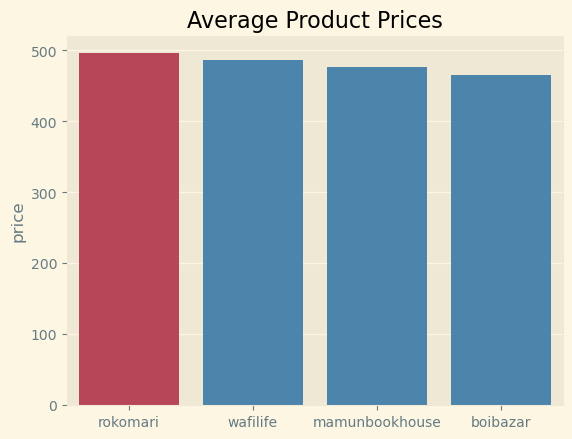

In [133]:
custom_palette = {'rokomari': '#cb334c', 'wafilife': '#3c87bc', 'mamunbookhouse': '#3c87bc', 'boibazar': '#3c87bc'}

g1 = sns.barplot(x=sites, y=avg_prices, hue=sites, palette=custom_palette)

g1.set_ylabel('price')
g1.set_title('Average Product Prices', fontsize=16);

#### Max & Min Priced Product From Rokomari

In [134]:
rokomari_max_prd = df_cleaned[df_cleaned['price_rokomari'] == df_cleaned['price_rokomari'].max()][['productid', 'productname', 'price_rokomari', 'price_wafilife', 'price_mamunbookhouse', 'price_boibazar', 'rpp']]
rokomari_min_prd = df_cleaned[df_cleaned['price_rokomari'] == df_cleaned['price_rokomari'].min()][['productid', 'productname', 'price_rokomari', 'price_wafilife', 'price_mamunbookhouse', 'price_boibazar', 'rpp']]

In [135]:
rokomari_max_prd

productid productname  price_rokomari  price_wafilife  \
4        105    Becoming             700             690   

   price_mamunbookhouse  price_boibazar    rpp  
4                   680             670  0.007

In [136]:
rokomari_min_prd

productid       productname  price_rokomari  price_wafilife  \
6        107  The Great Gatsby             300             290   

   price_mamunbookhouse  price_boibazar       rpp  
6                   280             270  0.014333

In [137]:
rokomari_max_prd['rpp'].values > rokomari_min_prd['rpp'].values

array([False])

Observation:
- For same products, rokomari has the ***highest average price***
- The most priced product has less `rpp` than the least priced product. So, ***lower priced products might have better rating impact***. Let's dive in further ahead.

### Rokomari Pricing Impact Analysis

In [138]:
df_cleaned[['price_rokomari', 'rating_rokomari', 'rpp']].corr()

price_rokomari  rating_rokomari       rpp
price_rokomari         1.000000         0.911309 -0.966831
rating_rokomari        0.911309         1.000000 -0.853156
rpp                   -0.966831        -0.853156  1.000000

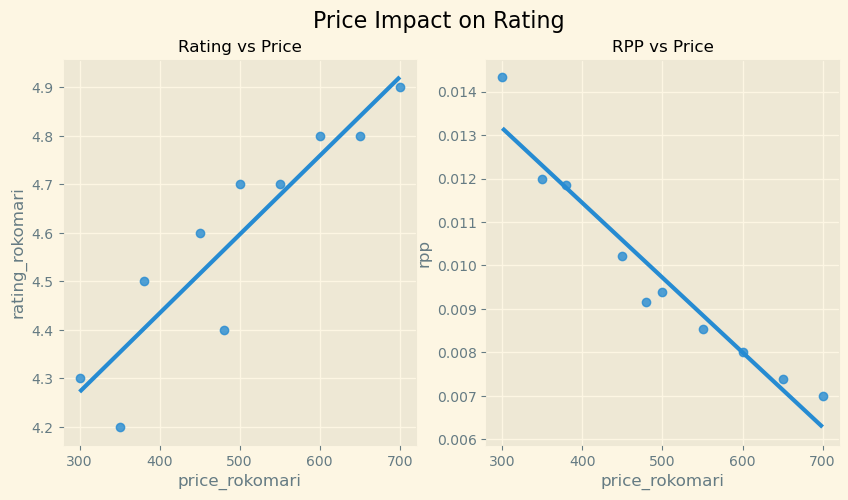

In [139]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.regplot(x='price_rokomari', y='rating_rokomari', data=df_cleaned, ci=False, ax=ax[0])
sns.regplot(x='price_rokomari', y='rpp', data=df_cleaned, ci=False, ax=ax[1])

ax[0].set_title('Rating vs Price', fontsize=12)
ax[1].set_title('RPP vs Price', fontsize=12)

fig.suptitle('Price Impact on Rating', fontsize=16)

plt.show()

although products with higher prices tend to have a higher rating but the ***rating to price ratio tend to decrease*** as well.

### Key Insights

1. **Highly Correlated Data**: There are similar data distribution and trend for all of price, rating, reviews across sites.
2. **Constant Offseted Price**: For the same products, the prices of other 3 sites are observed to have a constant offset from the rokomari prices.
3. **Better Market value**: Rokomari is comparatively expensive considering other 3 sites but has better average rating and reviews.
4. **Less Expensive, Better Response**: Higher priced products tend to have better rating but the rating to price ratio tend to decrease with it.

#### Insights Visualization

##### Highly Correlated Data

The following bar graphs show the shape of prices across all sites are identical. Same was observed for rating and reviews as well.

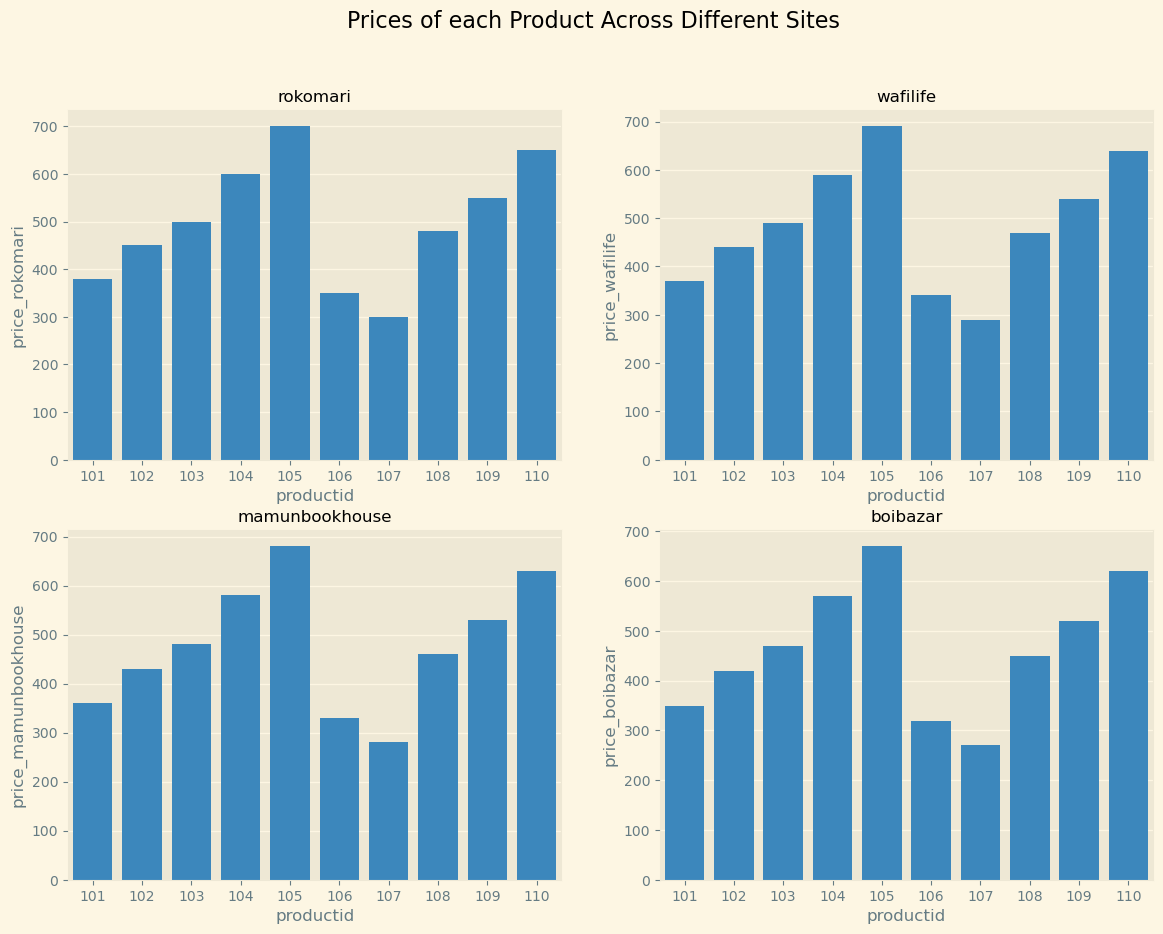

##### Constant Offseted Price

Its observed that, for the same products prices, ratings and reviews of wafilife, mamunbookhouse and boibazar have almost an constant offset from the same of rokomari. In all three attributes, they are less than the ones of rokomari. The point plots below show clear trend similary in price, rating and reviews for all 4 sites.

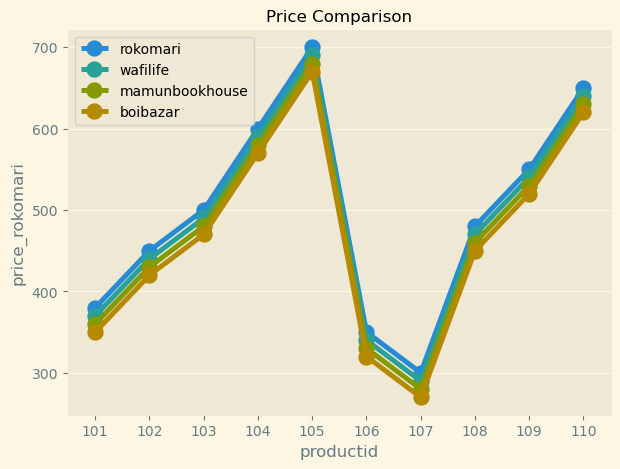 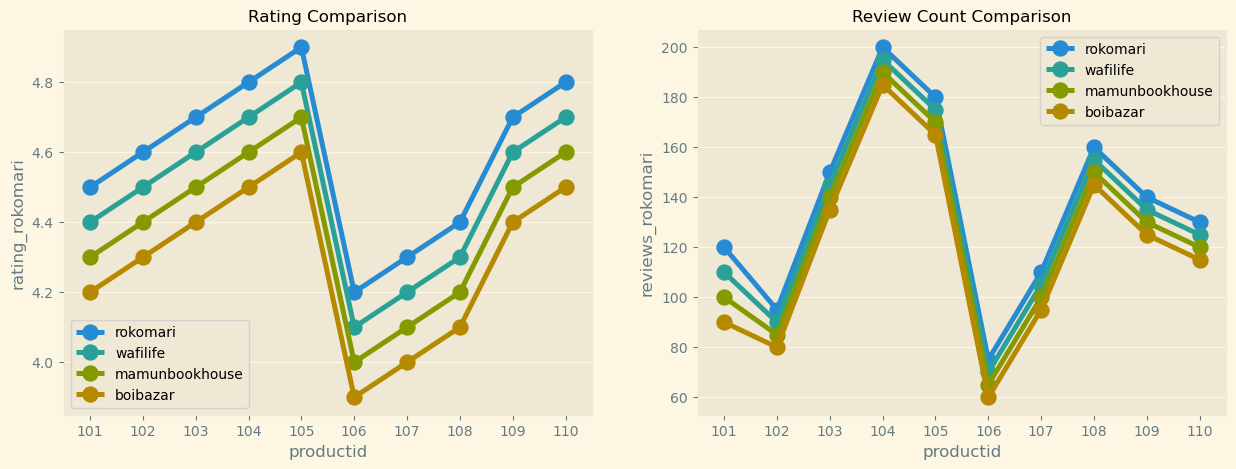



##### Better Market Value

Comparing the average of the offset values for price, rating and reviews: rokomari might have higher average prices but the data also tells it has better rating and reviews for the same products at hand. It indicates, rokomari has better market value. The bar graphs show exactly that, where more price of rokomari may be marked as negative (red marked) but its with more rating and reviews (green marked)!

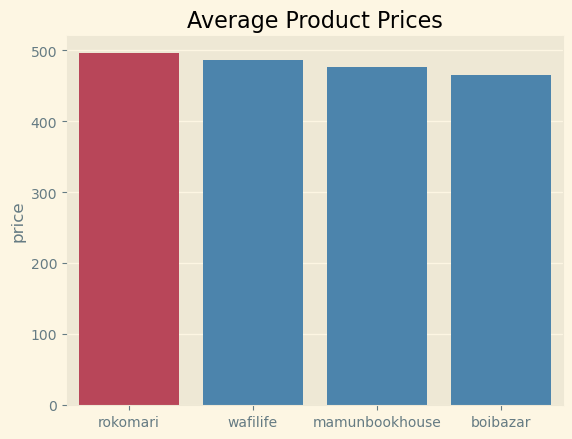 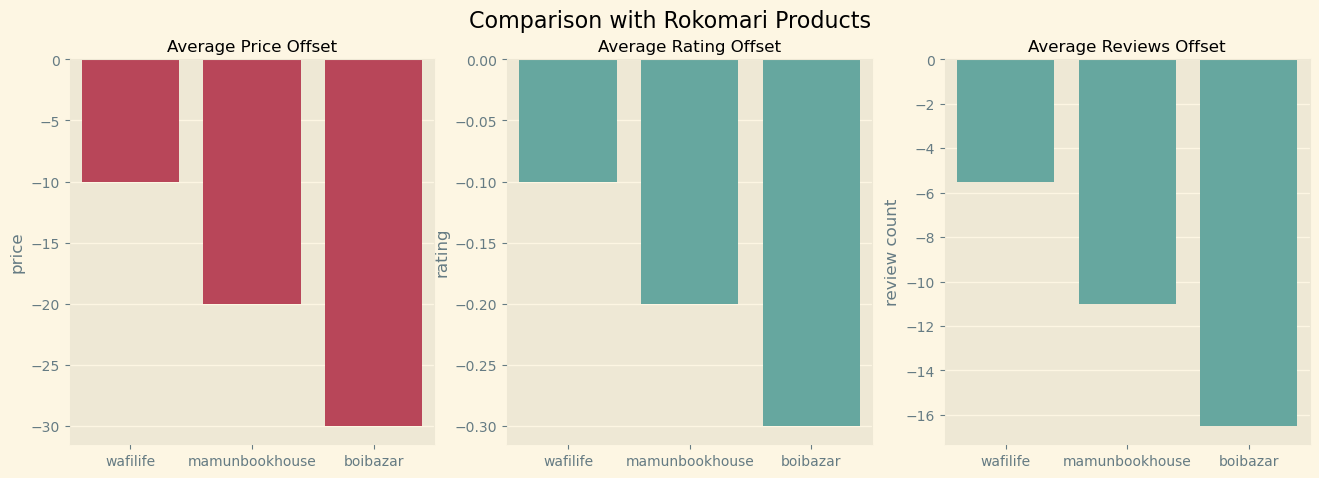

##### Less Expensive, Better Response

Its observed that products with higher prices tend to have a higher rating. Which is good but the rating to price ratio tend to decrease with prices as well as it seems. So far, cheaper products have a higher rating ratio, market must be loving those cheaper but quality products. The regression lines below explicitly indicate a proportional relation between rating and price and a disproportional rating between rating per price (rpp) and price.

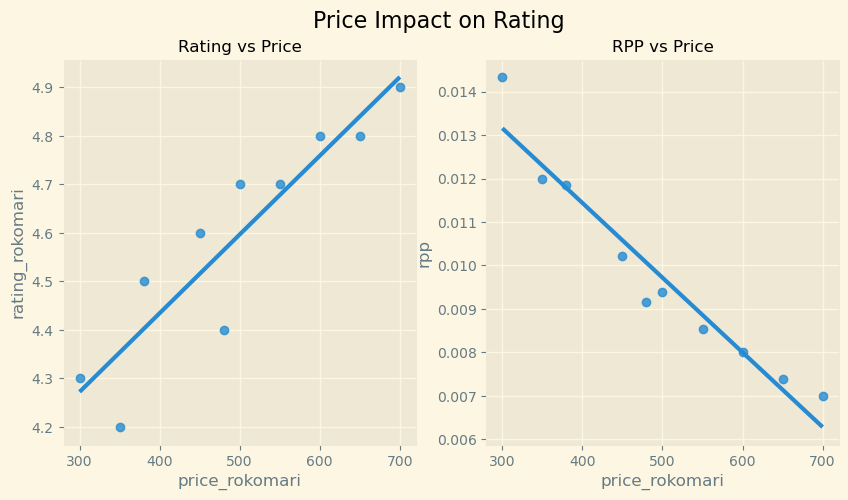

# Growth Hacking Ideas || A/B Test Cases

The tests should be conducted with proper planning and implementation. Some things to maintain:
- **Randomness**: Randomly assign users (desktop/mobile/tab users, usage time, location etc.) to either A or B to eliminate bias
- **Test Duration**: Run the tests for a sufficient period of time to gather enough data so the data is of statistical significance
- **Metrics Tracking**: Track the key metrics such as click through rates, conversion rates, bounce rates, average session duration etc. to measure user engagement.
- **Statistical Analysis**: Carefully implement  setup/pipeline to statistically analyzing the data, especially translating the z scores, p values, threshold values to reject a hypothesis.

In all the tests below, some users are put into case A and some others in B.

## Test01

Add a Language Button that can switch the text in the webpage to bangla or English. Check if there is a demand for language conversion.

Key Metric: click count, duration after language switch

A: Have a language switch button

B: Don't have a language switch button

## Test02

The left stack of shop by category, sort and filters are way too long, need to scroll a lot for product display. Change these in terms of UI-position.
- Take Shop by category, sort on the right pane.
- The filters are on top of the left pane.
- Filters are drop down, rather than expanded: takes less vertical space
- The price, discount and rating bar are on upper position in filter

Key Metric: overall distance (in terms of time to select a product), count of click to find product, count of left and right pane usage

A: position unchanged

B: position changed to upper side

A

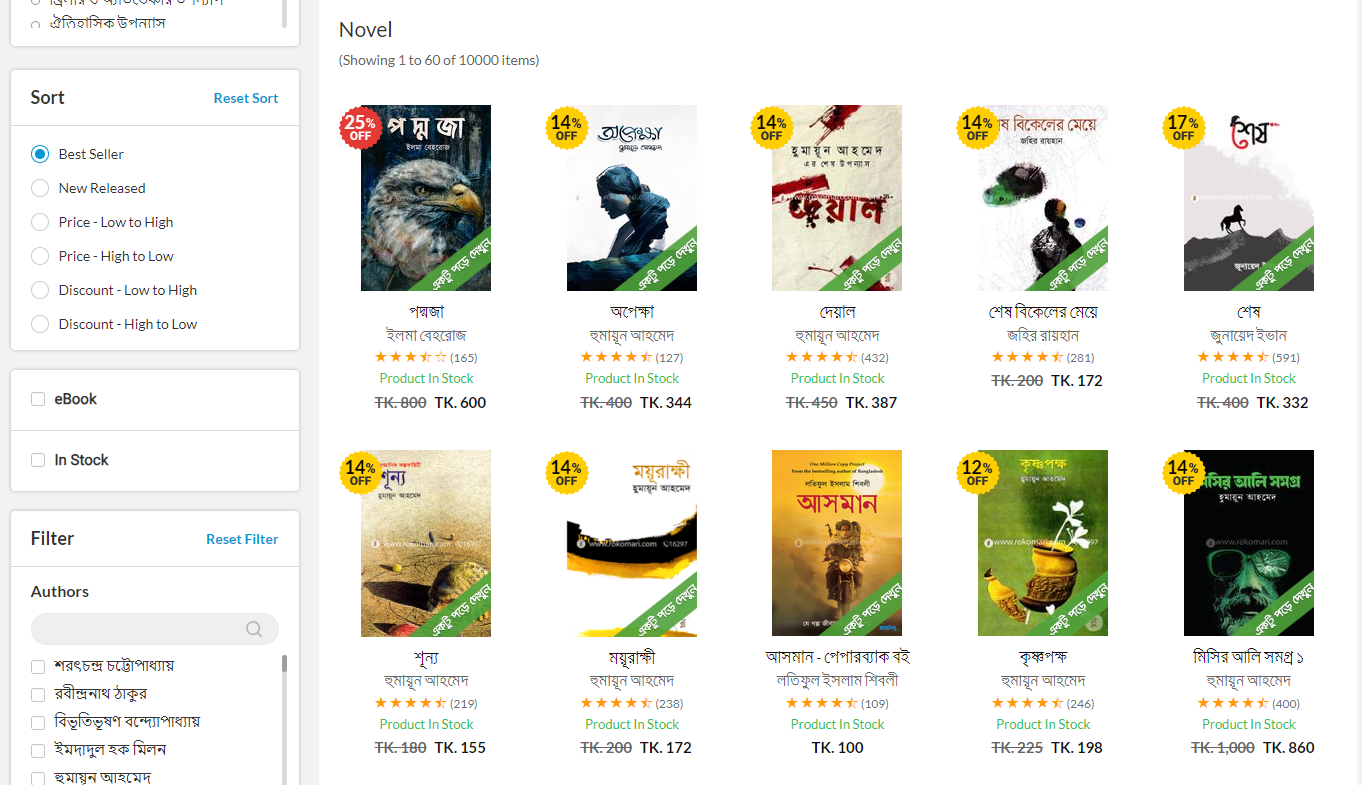

B

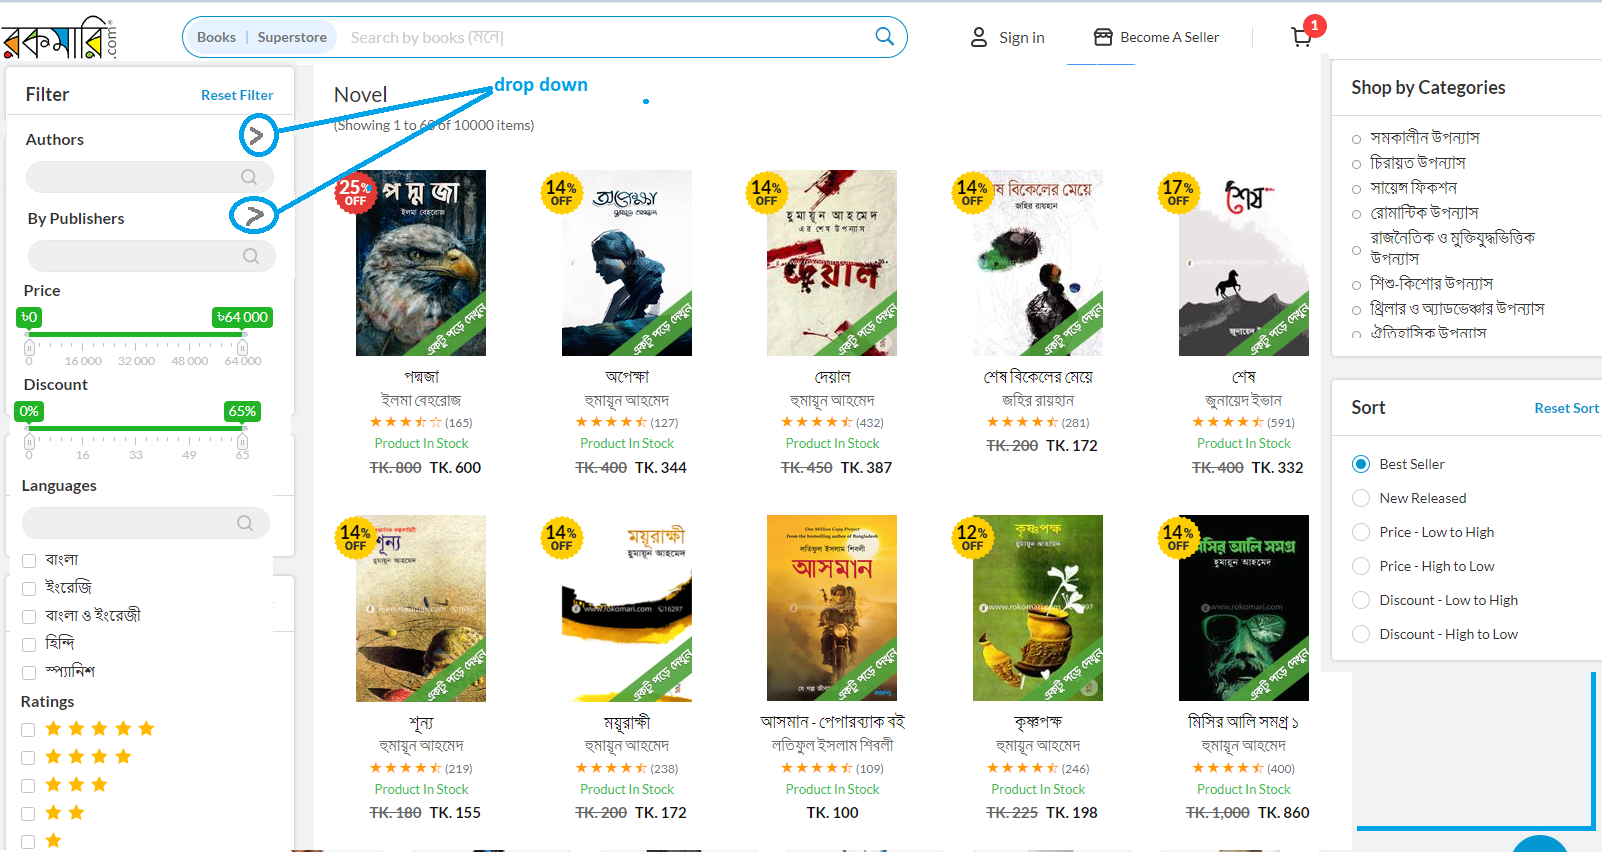

## Test03

In mobile view, the left tripple dash navigation bar already have authors section under books but that's three click away, hidden. Like books, superstore pretext showing in the search bar: add 'search author' pretext. Test if more people tend to search by author in the search bar or not and also check if overall distance in terms of time reduces or not for a sale.

Key Metric: count of searching author through search, overall distance

A: Don't have the 'search author' pretext

B: Have the 'search author' pretext

A

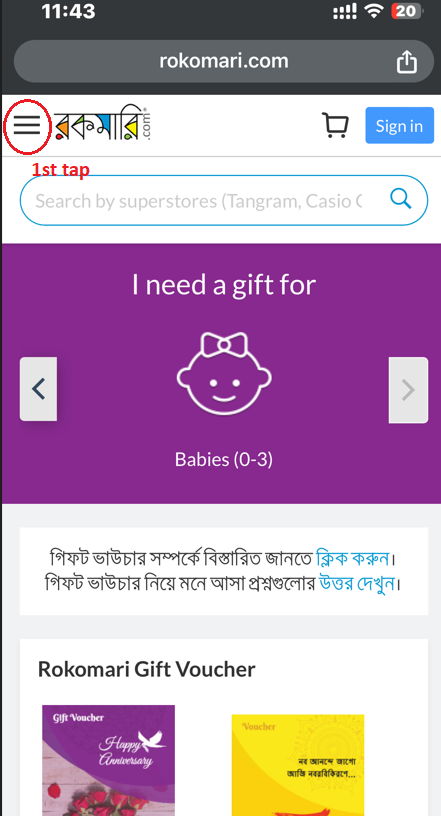  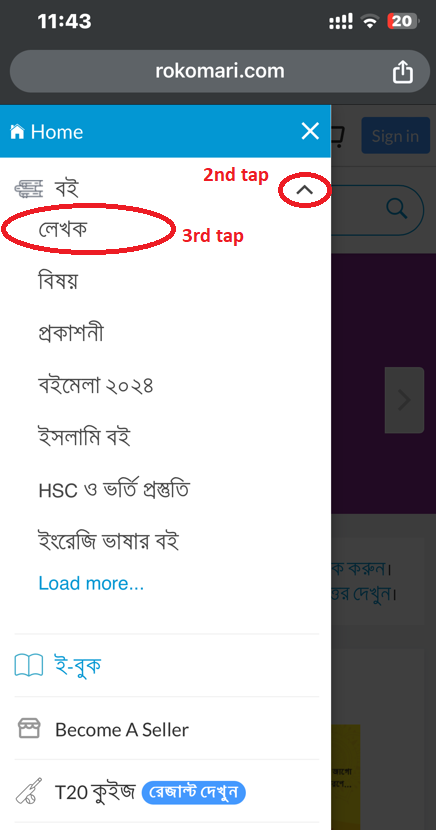

B

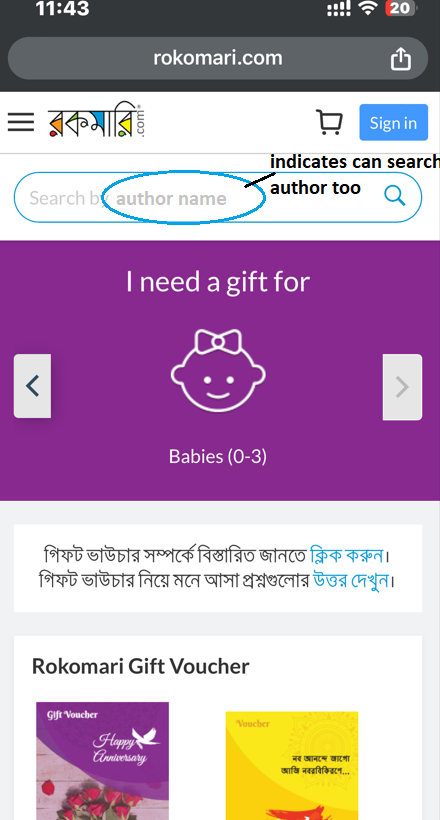

## Test04

Change the position of the advertisement div top of the home page to check whether the it is more user friendly UI or not. In the changed version, the product contents are comparatively on upper position than before.

Key Metric: click through rates, conversion rates, bounce rates, average session duration, count of clicking/using ad

A: position unchanged

B: position changed to the side of the home page

A

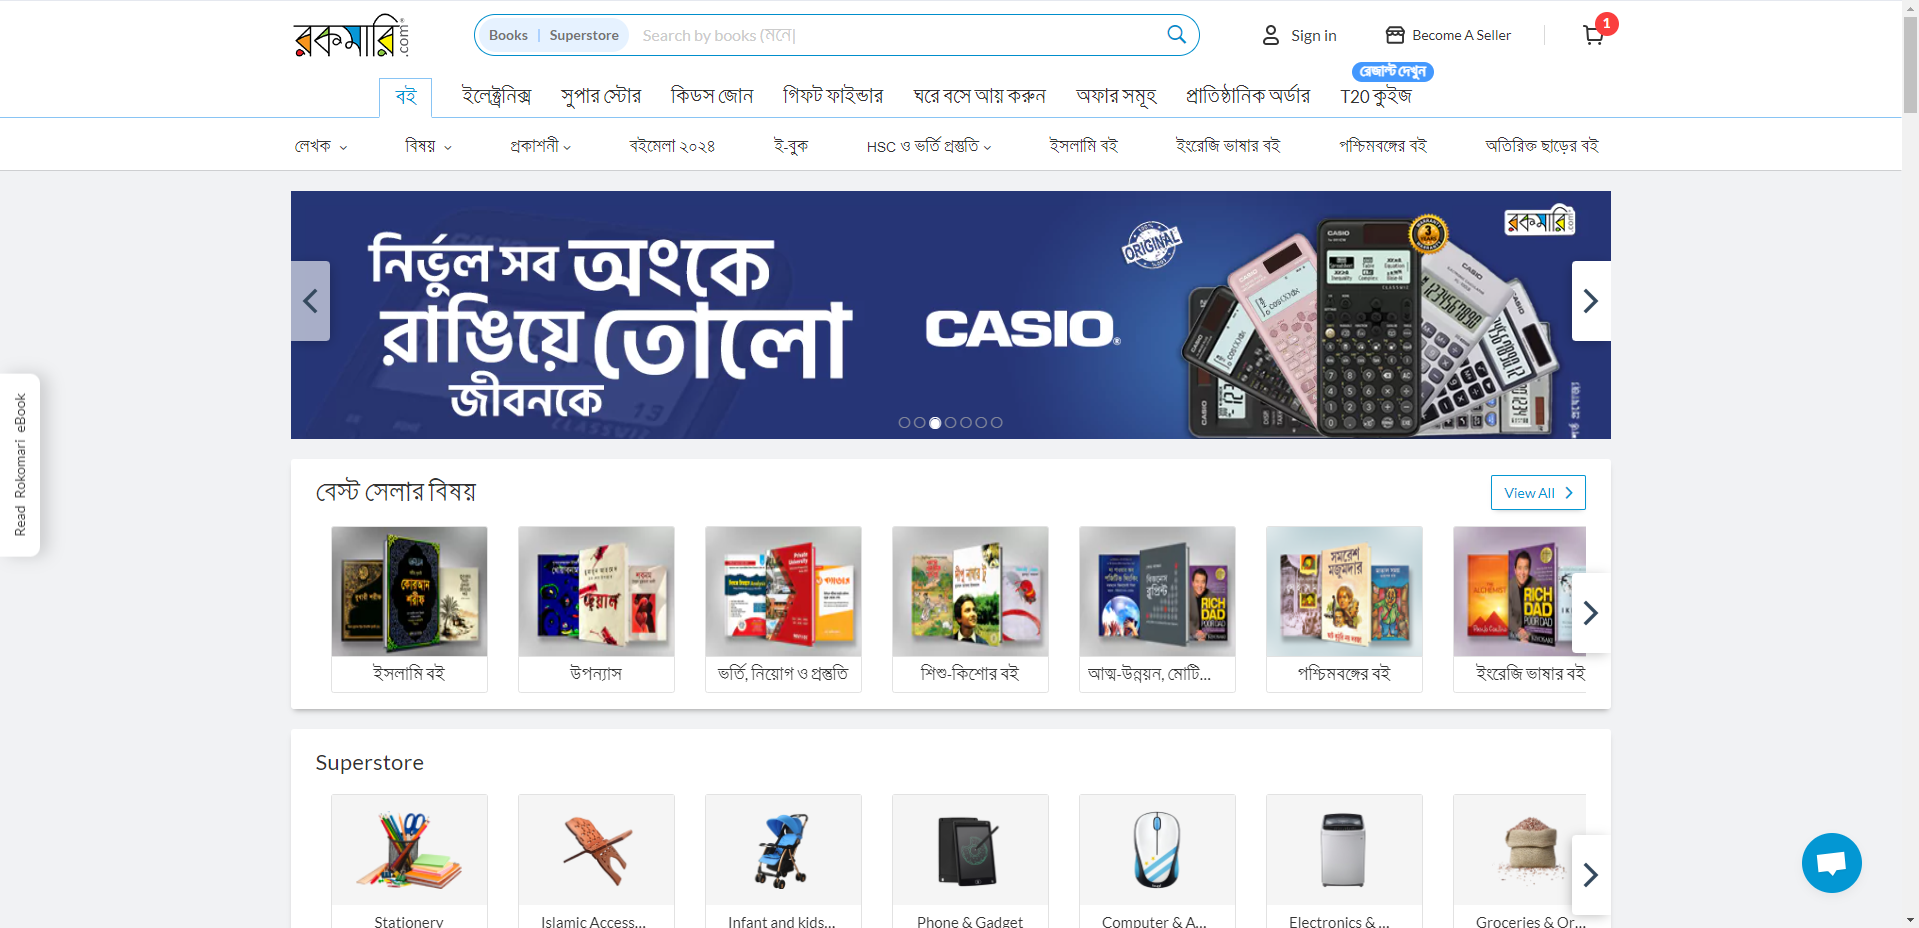

B

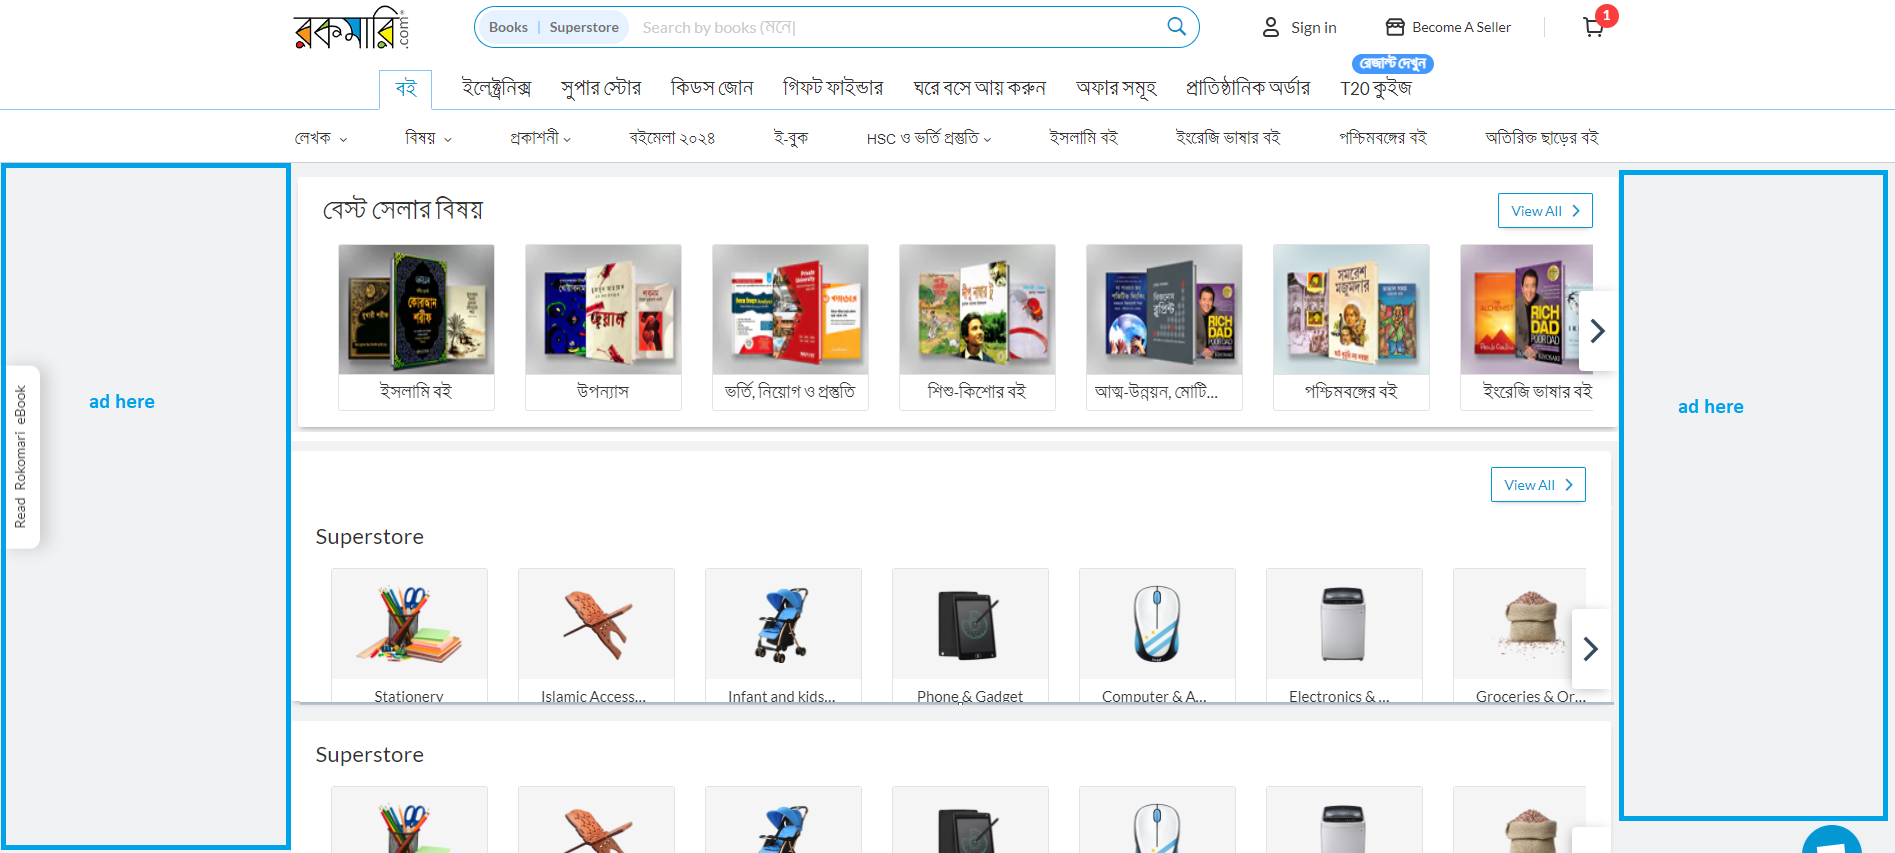

## Test05

Test the pop up advertisement at the beginning of the session.

Key Metric: count of clicking/using the ad, conversion rate, average session time

A: Have pop up advertisement

B: Don't have pop up advertisement